## Decision Tree for Air Quality Index Prediction

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
data = pd.read_pickle("./data/data_air_quality_index.pkl")

In [3]:
data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
data.shape

(1093, 9)

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [10]:
pred_dt_model = dt_model.predict(X_test)

In [11]:
dt_model.score(X_train, y_train)

1.0

In [12]:
dt_model.score(X_test, y_test)

0.5574468945147266

In [13]:
mean_squared_error(y_test, pred_dt_model)

3574.3110220065955

In [19]:
cross_val_score(dt_model,X,y,cv=5).mean()

0.4634541903263686

In [20]:

## Hyper Parameter Optimization

params={
    "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes": [None,10,20,30,40,50,60,70],
    "min_samples_leaf" : [ 1,2,3,4,5 ],
    "min_weight_fraction_leaf" : [0.1,0.2,0.3,0.4],
    "splitter" : ["best","random"]    
}

In [23]:
dt_model_reg = DecisionTreeRegressor()
dt_model_reg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
dt_model_regressor = GridSearchCV(estimator=dt_model_reg, param_grid=params, cv=5, scoring='neg_mean_squared_error')
dt_model_regressor.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60

In [26]:
dt_model_regressor.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='auto',
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.1,
                      presort=False, random_state=None, splitter='best')

In [27]:
dt_model_regressor.best_score_

-2925.024174864192

In [28]:
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='auto',
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.1,
                      presort=False, random_state=None, splitter='best')
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='auto',
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.1,
                      presort=False, random_state=None, splitter='best')

In [29]:
pred_dt_regressor = dt_regressor.predict(X_test)

In [30]:
dt_regressor.score(X_train, y_train)

0.5881705538579276

In [31]:
dt_regressor.score(X_test, y_test)

0.5911769745568612

In [32]:
mean_squared_error(y_test, pred_dt_regressor)

3301.8876780656087

In [34]:
cross_val_score(dt_regressor, X, y).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5056781345545038

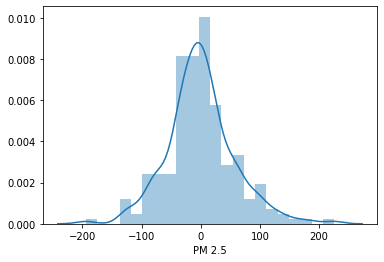

In [37]:
sns.distplot(y_test-pred_dt_regressor)
plt.show()

In [36]:
(y_test-pred_dt_regressor).var()

3317.0022168858595